# Test of widgets

## Import / check gpu / prepare dataset

In [1]:
from fastai.vision.widgets import *
from fastai.vision.all import *

In [2]:
# CUDA
if torch.cuda.is_available(): print("using cuda:", torch.cuda.get_device_name(0))
else: print("using cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

using cuda: GeForce GTX 960


In [3]:
path = untar_data(URLs.MNIST) # return Path python object

In [4]:
path

Path('C:/Users/nvtny/.fastai/data/mnist_png')

### Model

In [5]:
model_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

In [6]:
model_block = model_block.new(item_tfms=RandomResizedCrop(28, min_scale=0.2))
dls = model_block.dataloaders(path, num_workers=0)

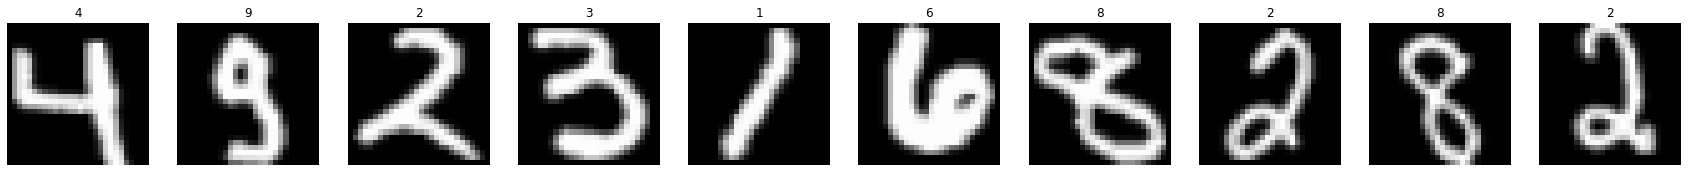

In [7]:
dls.valid.show_batch(max_n=10, nrows=1)

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.306800,0.620626,0.192929,03:17


epoch,train_loss,valid_loss,error_rate,time
0,0.497471,0.101070,0.030286,03:03
1,0.326809,0.051816,0.015357,03:12
2,0.255411,0.046645,0.014214,03:08
3,0.253348,0.039994,0.012643,03:05


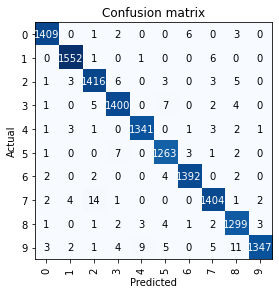

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Clean (unneccesarry)

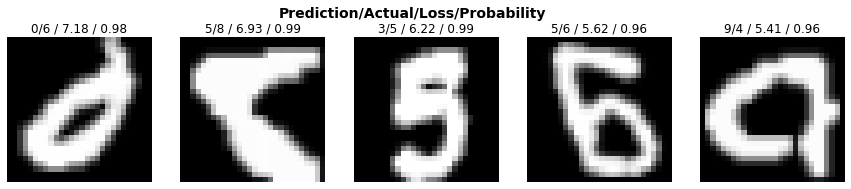

In [43]:
interp.plot_top_losses(5, nrows=1)

In [44]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [45]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Save and load model

In [37]:
### Get image
sam_img = Image.open("sample_image.png")
sam_img = sam_img.resize((28, 28))
#sam_img.to_thumb(128, 128)
sam_img.save("sample_image_.png", "PNG")

In [38]:
learn.export()

#### *Load*

In [9]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [10]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict("sample_image_.png")

('7',
 tensor(7),
 tensor([2.3525e-05, 3.9611e-05, 2.2045e-03, 1.5855e-03, 1.5118e-04, 2.3270e-04,
         5.6559e-06, 9.9550e-01, 1.2034e-04, 1.3616e-04]))

In [11]:
learn_inf.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Deploying

In [12]:
# Prepare buttons (Voila -> widgets)
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description="Classify")
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [13]:
# button for predicting using model
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"

btn_run.on_click(on_click_classify)

In [14]:
# show widgets
VBox([widgets.Label("Select your digit! (will classify last uploaded)"), 
      btn_upload, btn_run, out_pl, lbl_pred])